In [375]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from datetime import datetime
import math

%matplotlib inline

In [429]:
data1 = pd.read_csv('train/train.csv',parse_dates=['timestamp'])
macro=pd.read_csv('macro.csv',parse_dates=['timestamp'])
test =pd.read_csv('test/test.csv',parse_dates=['timestamp'])
test_size = test.shape[0]
# merge two dataset into one

datatemp = pd.merge(data1, macro,how='left',on='timestamp',sort=True)
testtemp = pd.merge(test, macro,how='left',on='timestamp',sort=True)
#datatemp.dropna(subset=['id'],inplace=True)
print(datatemp.shape)
print(data1.shape)
print(macro.shape)
print(test.shape)
print(test_size)
print(testtemp.shape)

(30471, 391)
(30471, 292)
(2484, 100)
(7662, 291)
7662
(7662, 390)


In [377]:
pd.DataFrame(datatemp.dtypes.value_counts()).reset_index().rename(columns={'index':'DataType',0:'Counts'})

,DataType,Counts
0,float64,213
1,int64,159
2,object,18
3,datetime64[ns],1


In [378]:
class find_info(object):
    def __init__(self,df):
        """
        Please give the parameters: df is the data frame and id is the unique column.
        """
        self.df = df
    
    def func_desc(self,id):
        
        meanvar=np.round(self.df.mean(),1)
        minvar=self.df.min()
        maxvar=self.df.max()
        stdvar=np.round(self.df.std(),1)
        countvar=self.df.count()
        totalvar=self.df.id.count()
        missing_pct=np.round(100*(totalvar-countvar)/totalvar,1)
        statistics=pd.concat([meanvar, minvar, maxvar, stdvar, countvar,missing_pct], axis=1) 
        stat_df = pd.DataFrame(statistics).reset_index()
        orname=list(stat_df.columns.values)
        stat_df.rename(columns={orname[0]: 'variable', orname[1]: 'mean', 
                    orname[2]: 'min', orname[3]: 'max',
                    orname[4]: 'std',orname[5]: 'non_missing',
                    orname[6]: 'missing_pct'},                  
                    inplace = True)
        stat_df.sort_values(by='missing_pct',ascending=True,inplace=True)
        return stat_df

    def find_conlumns_by_type(self,type):
        objtype = type
        objdf = self.df.select_dtypes(include=objtype)
        return objdf

In [379]:
# Using create function to look into datatemp

find_information_temp = find_info(data1)

des_temp = find_information_temp.func_desc('id')
des_temp.head()

,variable,mean,min,max,std,non_missing,missing_pct
0,0_13_all,9841.1,322,36035,7290.0,30471,0.0
178,market_count_500,0.1,0,4,0.4,30471,0.0
179,market_count_5000,6.0,0,21,4.9,30471,0.0
180,market_shop_km,4.0,0.00384715,41.1037,3.4,30471,0.0
183,metro_km_avto,3.7,0,74.9058,5.8,30471,0.0


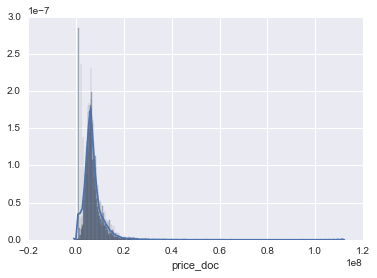

In [474]:
sns.distplot(data1['price_doc'],bins=1000)

In [381]:
from datetime import datetime as dt

data2=pd.DataFrame()
data2['price'] = data1.price_doc
data2['year'] = data1.timestamp.dt.year
datatemp['year'] = data1.timestamp.dt.year
data2.head()

,price,year
0,5850000,2011
1,6000000,2011
2,5700000,2011
3,13100000,2011
4,16331452,2011


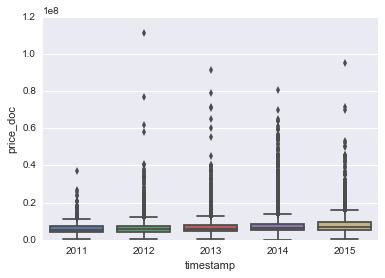

In [382]:
sns.boxplot(x=data2.year,y=data2.price,data=data2)

In [383]:
total_cnts = datatemp[datatemp['year']==2011]['price_doc'].value_counts().sum()
cnts = datatemp[(datatemp['year']==2011) & (datatemp['price_doc']>20000000)]['price_doc'].value_counts().sum()
print("Year 2011: " + str(cnts/total_cnts))

total_cnts = datatemp[datatemp['year']==2012]['price_doc'].value_counts().sum()
cnts = datatemp[(datatemp['year']==2012) & (datatemp['price_doc']>22000000)]['price_doc'].value_counts().sum()
print("Year 2012: " + str(cnts/total_cnts))

total_cnts = datatemp[datatemp['year']==2013]['price_doc'].value_counts().sum()
cnts = datatemp[(datatemp['year']==2013) & (datatemp['price_doc']>22000000)]['price_doc'].value_counts().sum()
print("Year 2013: " + str(cnts/total_cnts))

total_cnts = datatemp[datatemp['year']==2014]['price_doc'].value_counts().sum()
cnts = datatemp[(datatemp['year']==2014) & (datatemp['price_doc']>27000000)]['price_doc'].value_counts().sum()
print("Year 2014: " + str(cnts/total_cnts))

total_cnts = datatemp[datatemp['year']==2015]['price_doc'].value_counts().sum()
cnts = datatemp[(datatemp['year']==2015) & (datatemp['price_doc']>30000000)]['price_doc'].value_counts().sum()
print("Year 2015: " + str(cnts/total_cnts))

Year 2011: 0.010624169986719787
Year 2012: 0.010539367637941723
Year 2013: 0.010779644021057909
Year 2014: 0.00922266139657444
Year 2015: 0.010805804260574252


In [384]:
#We will delete the price greater than 25000000 for now 9.8% of the datatemp
for year in [2011,2012,2013,2014,2015]:
    if 2011:
        data=datatemp.drop(datatemp.price_doc>=20000000,axis=0)
    if 2012:
        data=datatemp.drop(datatemp.price_doc>=22000000,axis=0)
    if 2013:
        data=datatemp.drop(datatemp.price_doc>=22000000,axis=0)
    if 2014:
        data=datatemp.drop(datatemp.price_doc>=27000000,axis=0)
    if 2015:
        data=datatemp.drop(datatemp.price_doc>=30000000,axis=0)
    else:
        print("check data")
data.drop('year',axis=1,inplace=True)
data.shape

(30469, 391)

In [385]:
# Using distince value counts to find out stange value in data
# Found old_education_build_share and modern_education_share has value of 8,12345
# child_on_acc_pre_school has "#!"
obj_name_list = data.select_dtypes(include=['object']).columns
for distin in obj_name_list:
    print("Column name "+distin+" distinct values:")
    print(data[distin].value_counts())

Column name product_type distinct values:
Investment       19446
OwnerOccupier    11023
Name: product_type, dtype: int64
Column name sub_area distinct values:
Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
Mitino                             679
Tverskoe                           678
Krjukovo                           518
Mar'ino                            508
Poselenie Filimonkovskoe           496
Juzhnoe Butovo                     451
Poselenie Shherbinka               443
Solncevo                           421
Zapadnoe Degunino                  410
Poselenie Desjonovskoe             362
Otradnoe                           353
Nagatinskij Zaton                  326
Nagornoe                           305
Bogorodskoe                        305
Strogino                           301
Izmajlovo                          300
Tekstil'shhiki        

In [422]:
obj_name_list = testtemp.select_dtypes(include=['object']).columns
for distin in obj_name_list:
    print("Column name "+distin+" distinct values:")
    print(testtemp[distin].value_counts())

Column name product_type distinct values:
Investment       4998
OwnerOccupier    2631
Name: product_type, dtype: int64
Column name sub_area distinct values:
Poselenie Vnukovskoe              584
Poselenie Sosenskoe               297
Solncevo                          285
Nagatinskij Zaton                 244
Poselenie Moskovskij              229
Tverskoe                          181
Mitino                            173
Poselenie Desjonovskoe            167
Zapadnoe Degunino                 146
Mar'ino                           125
Juzhnoe Butovo                    118
Nekrasovka                         99
Poselenie Shherbinka               98
Otradnoe                           97
Poselenie Novofedorovskoe          95
Sviblovo                           95
Golovinskoe                        94
Filevskij Park                     83
Krjukovo                           82
Danilovskoe                        79
Chertanovo Juzhnoe                 77
Nagornoe                           72
Ljublin

In [386]:

# Then come back to clean up this column
import re
from collections import Counter

def clean_comma(line):
    c=Counter(list(line))
    if c[',']<=0:
        pass
    else:
        line_num = int(re.sub(',','',line))
        return line_num
    
columns2clean = ['old_education_build_share', 'modern_education_share','child_on_acc_pre_school']
for col in columns2clean:
    col_new = []
    for item in data[col]:
        if pd.isnull(item) or item.strip() == '#!':
            col_new.append(np.nan)
        else:
            col_new.append(clean_comma(str(item)))
    data[col] = col_new
    print(col_new[-10:])

[82517, 82517, 82517, 82517, 82517, 82517, 82517, 82517, 82517, 82517]
[954918, 954918, 954918, 954918, 954918, 954918, 954918, 954918, 954918, 954918]
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [387]:
# Using create function to look into datatemp

find_information = find_info(data)

des = find_information.func_desc('id')
des.head()

,variable,mean,min,max,std,non_missing,missing_pct
0,0_13_all,9840.7,322,36035,7290.0,30469,0.0
253,net_capital_export,0.0,-0.277116,0.614395,0.2,30469,0.0
251,museum_km,7.1,0.00790269,59.2031,5.7,30469,0.0
250,mosque_km,7.7,0.00554452,44.8498,5.8,30469,0.0
249,mosque_count_5000,0.4,0,2,0.6,30469,0.0


In [388]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [389]:
combined = pd.concat([datatemp.drop('price_doc',axis=1),testtemp],axis=0).reset_index()
print(combined.shape)
print(sum(combined.index.value_counts()>1))

(38133, 392)
0


In [390]:
num = combined.select_dtypes(include=['int16','int32','int64','float16','float32','float64'])
obj = combined.select_dtypes(include=['object'])
head = pd.DataFrame(pd.isnull(num).sum(),columns=['cnt'])
missing = head[head.cnt>0].index.values
missing[:20]

array(['ID_railroad_station_walk', 'apartment_build', 'apartment_fund_sqm',
       'average_life_exp', 'bandwidth_sports', 'baths_share',
       'build_count_1921-1945', 'build_count_1946-1970',
       'build_count_1971-1995', 'build_count_after_1995',
       'build_count_before_1920', 'build_count_block', 'build_count_brick',
       'build_count_foam', 'build_count_frame', 'build_count_mix',
       'build_count_monolith', 'build_count_panel', 'build_count_slag',
       'build_count_wood'], dtype=object)

In [391]:
combined.drop(obj.columns,axis=1,inplace=True)
combined.shape

(38133, 374)

In [392]:
for name in missing:
    combined[name+"_missing"] = pd.isnull(combined[name])+0
    combined[name].fillna(combined[name].mean(),inplace=True)

In [475]:
obj.fillna(value='missing',inplace=True)
pd.isnull(obj).sum()

C:\Users\hotma\Anaconda3\lib\site-packages\pandas\core\frame.py:2852: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


big_market_raion             0
big_road1_1line              0
child_on_acc_pre_school      0
culture_objects_top_25       0
detention_facility_raion     0
ecology                      0
incineration_raion           0
modern_education_share       0
nuclear_reactor_raion        0
oil_chemistry_raion          0
old_education_build_share    0
product_type                 0
radiation_raion              0
railroad_1line               0
railroad_terminal_raion      0
sub_area                     0
thermal_power_plant_raion    0
water_1line                  0
dtype: int64

In [394]:
le = LabelEncoder()
obj_2 = le.fit_transform(np.array(obj)[:,0])

for i in range(1, np.array(obj).shape[1]):
        enc_label = LabelEncoder()
        obj_2 = np.column_stack((obj_2, enc_label.fit_transform(np.array(obj)[:,i])))
train_categorical_values = obj_2.astype(float)

In [395]:
enc_onehot = OneHotEncoder()
train_cat_data = enc_onehot.fit_transform(train_categorical_values)

In [396]:
cols = [obj.columns[i] + '_' + str(j) for i in range(0,len(obj.columns)) for j in range(0,enc_onehot.n_values_[i]) ]
train_cat_data_df = pd.DataFrame(train_cat_data.toarray(),columns=cols)

In [432]:
data_cleaned = pd.concat([combined, train_cat_data_df],axis=1)
id_list=data_cleaned.id[-test_size:]

In [433]:
data_cleaned.drop(['index','id','timestamp'],axis=1,inplace=True)

In [461]:
train2model = data_cleaned[:-test_size]
test2model = data_cleaned[-test_size:]

In [435]:
# Try log the price
y = data1['price_doc']
#y = [np.log(y) for y in data1['price_doc']]
X = train2model

In [436]:
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

In [437]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [438]:
def rmsle(preds, actual):
    labels = list(actual)
    preds = list(preds)
    terms_to_sum = [(math.log(labels[i] + 1) - math.log(max(0, preds[i]) + 1)) ** 2.0 for i, pred in enumerate(labels)]
    return 'rmsle', (sum(terms_to_sum) * (1.0 / len(preds))) ** 0.5

In [439]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc, r2_score

In [440]:
linear_model = LinearRegression()
linear = linear_model.fit(X_train, y_train)
pred_train=linear.predict(X_train)
pred_linear=linear.predict(X_test)

In [441]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

In [442]:
#fpr,tpr,thresholds=roc_curve(y_test, pred_linear,pos_label=2)
#roc_auc = auc(fpr,tpr)
#print(roc_auc)

#print(math.sqrt(mean_squared_error(np.array(y_test),pred_linear)))
print(linear.score(X_train, y_train))
print(r2_score(y_test,pred_linear))

0.471028353274
-2520.45702568


In [443]:
rmsle(pred_linear, y_test)

('rmsle', 0.583391594071928)

In [444]:
import matplotlib.pyplot as plt
%matplotlib inline


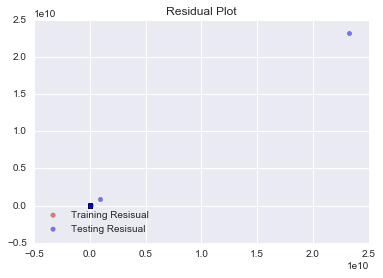

In [445]:
# Residual plot
train = plt.scatter(pred_train,(pred_train-y_train),c='r',alpha=0.5)
test = plt.scatter(pred_linear,(pred_linear-y_test),c='b',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=10)
plt.legend((train,test),('Training Resisual','Testing Resisual'),loc='lower left')
plt.title('Residual Plot')

In [462]:
# Price predicting
result_lin = linear.predict(test2model)
result_lin

array([  4815132.59008896,   8350475.95253766,   5766309.24836433, ...,
         4355191.99207938,   5800062.76571023,  10084339.39388537])

In [447]:
from sklearn.ensemble import GradientBoostingRegressor

In [448]:
r=GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=5,loss='ls')

In [449]:
fit_gd = r.fit(X_train, y_train)
pred_gd = fit_gd.predict(X_test)
#print(math.sqrt(mean_squared_error(y_test,pred_gd)))
#print(fit_gd.score())


In [450]:
print(fit_gd.score(X_train, y_train))
print(r2_score(y_test,pred_gd))

0.83590094617
0.699298748828


In [451]:
pred_gd_train = fit_gd.predict(X_train)

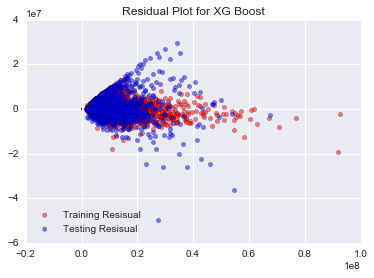

In [452]:
train = plt.scatter(pred_gd_train,(pred_gd_train-y_train),c='r',alpha=0.5)
test = plt.scatter(pred_gd,(pred_gd-y_test),c='b',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=10)
plt.legend((train,test),('Training Resisual','Testing Resisual'),loc='lower left')
plt.title('Residual Plot for XG Boost')

In [495]:
# Price predicting
result_gd = fit_gd.predict(test2model)
result_gd_final = pd.DataFrame()
result_gd_final['id'] = id_list
result_gd_final['price_doc'] = result_gd
result_gd_final.to_csv('price_results.csv',index=False)

In [485]:
test_merge = testtemp
test_merge['predicted_price'] = result_gd
test_merge.sort_values(by='timestamp',ascending=False)
test_merge.set_index('timestamp',inplace=True)

In [488]:
test_merge.columns

Index(['id', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material',
       'build_year', 'num_room', 'kitch_sq', 'state',
       ...
       'turnover_catering_per_cap', 'theaters_viewers_per_1000_cap',
       'seats_theather_rfmin_per_100000_cap', 'museum_visitis_per_100_cap',
       'bandwidth_sports', 'population_reg_sports_share',
       'students_reg_sports_share', 'apartment_build', 'apartment_fund_sqm',
       'predicted_price'],
      dtype='object', length=390)

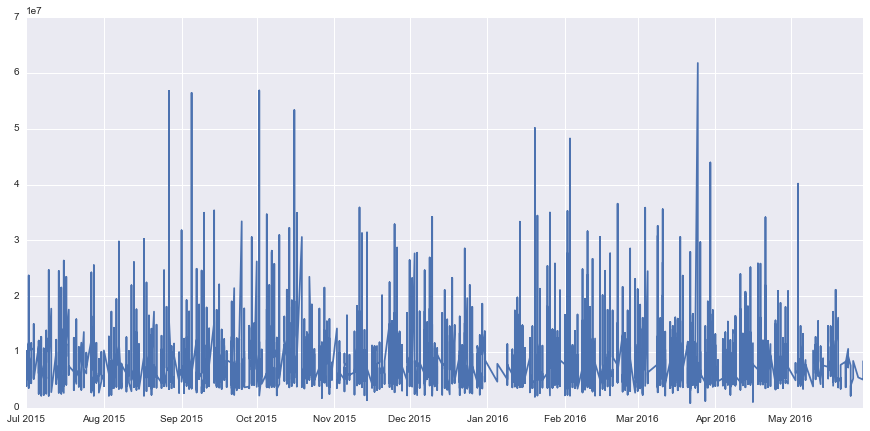

In [493]:
plt.figure(figsize=(15,7))
plt.plot(test_merge['predicted_price'],)

In [464]:
from sklearn.ensemble import RandomForestRegressor

In [465]:
rf = RandomForestRegressor()

In [466]:
rf_model = rf.fit(X_train, y_train)

In [467]:
pred_rf_train = rf_model.predict(X_train)
pred_rf_test = rf_model.predict(X_test)
print(math.sqrt(mean_squared_error(pred_rf_test,y_test)))

2784200.9023111826


In [468]:
print(rf_model.score(X_train, y_train))
print(r2_score(y_test,pred_rf_test))

0.939292460905
0.667821791205


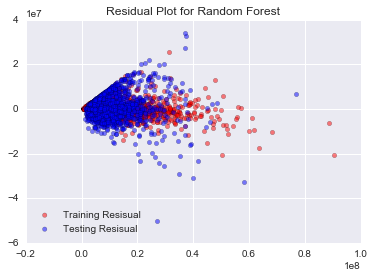

In [469]:
train = plt.scatter(pred_rf_train,(pred_rf_train-y_train),c='r',alpha=0.5)
test = plt.scatter(pred_rf_test,(pred_rf_test-y_test),c='b',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=10)
plt.legend((train,test),('Training Resisual','Testing Resisual'),loc='lower left')
plt.title('Residual Plot for Random Forest')

In [470]:
# Price predicting
result_rf = rf_model.predict(test2model)
result_rf

array([ 5977000. ,  8824837.4,  5590000. , ...,  4604685.7,  5155000. ,
        7471449.3])

In [471]:
# Price predicting
result_rf = rf_model.predict(test2model)

result_rf_final = pd.DataFrame()
result_rf_final['id'] = id_list
result_rf_final['price'] = result_rf